In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
pima.drop(0, inplace=True)

In [4]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pima.reset_index(drop=True, inplace=True)

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima.dtypes

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object

In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [9]:
X


,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.34
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: object

In [11]:
# split X and y into training and testing sets
# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# This does not work because sklearn.cross_validation has been removed.

In [12]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
X_train, y_train

(    pregnant insulin   bmi age glucose  bp pedigree
 762        9       0  22.5  33      89  62    0.142
 127        1      94  33.3  23     118  58    0.261
 564        0       0  32.4  27      91  80    0.601
 375       12     325  39.2  58     140  82    0.528
 663        9     130  37.9  40     145  80    0.637
 ..       ...     ...   ...  ..     ...  ..      ...
 763       10     180  32.9  63     101  76    0.171
 192        7       0  30.4  36     159  66    0.383
 629        4       0  24.7  21      94  65    0.148
 559       11       0  30.1  35      85  74      0.3
 684        5       0     0  69     136  82     0.64
 
 [576 rows x 7 columns],
 762    0
 127    0
 564    0
 375    1
 663    1
       ..
 763    0
 192    1
 629    0
 559    0
 684    0
 Name: label, Length: 576, dtype: object)

In [14]:
X_test, y_test

(    pregnant insulin   bmi age glucose  bp pedigree
 661        1       0  42.9  22     199  76    1.394
 122        2     100  33.6  23     107  74    0.404
 113        4       0    34  25      76  62    0.391
 14         5     175  25.8  51     166  72    0.587
 529        0       0  24.6  31     111  65     0.66
 ..       ...     ...   ...  ..     ...  ..      ...
 366        6       0  27.6  29     124  72    0.368
 301        2     135  31.6  25     144  58    0.422
 382        1     182  25.4  21     109  60    0.947
 140        3       0  21.1  55     128  78    0.268
 463        5       0  27.6  37      88  78    0.258
 
 [192 rows x 7 columns],
 661    1
 122    0
 113    0
 14     1
 529    0
       ..
 366    1
 301    1
 382    0
 140    0
 463    0
 Name: label, Length: 192, dtype: object)

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=200)


I needed to increase max_iter to 200 because the Logistic Regression classifier
would not converge when fitting the model.

In [16]:
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [17]:
logreg.coef_

array([[ 8.73300465e-02, -6.82011599e-04,  9.21573172e-02,
         2.08861266e-02,  3.26117199e-02, -1.03339810e-02,
         8.16983283e-01]])

In [18]:
logreg.intercept_

array([-8.37688181])

In [19]:
logreg.n_iter_

array([123], dtype=int32)

In [20]:
logreg.classes_

array(['0', '1'], dtype=object)

In [21]:
y_pred=logreg.predict(X_test)

In [22]:
y_pred

array(['1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [23]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

In [24]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

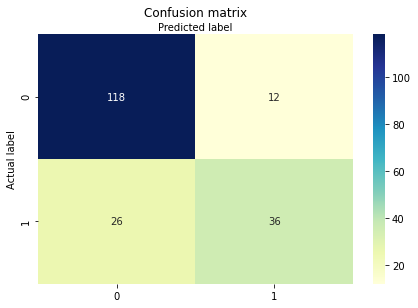

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
pd.DataFrame(cnf_matrix)

,0,1
0,118,12
1,26,36


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8020833333333334


In [28]:
# print("Precision:",metrics.precision_score(y_test, y_pred))
# This is fixed in the next line.

In [29]:
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='1', average='binary'))

Precision: 0.75


In [30]:
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='1'))

Recall: 0.5806451612903226


In [31]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

In [32]:
y_pred_proba

array([0.95104763, 0.16263448, 0.09842616, 0.63002771, 0.12185919,
       0.03785247, 0.73379911, 0.84907581, 0.38571191, 0.3823105 ,
       0.56893817, 0.96088638, 0.29025454, 0.16698221, 0.12067168,
       0.15054792, 0.84282561, 0.02497089, 0.4078187 , 0.23890249,
       0.64441801, 0.44462057, 0.17537902, 0.06639308, 0.05174361,
       0.33004814, 0.04584582, 0.90537387, 0.10195048, 0.14253168,
       0.45083616, 0.23511718, 0.10166301, 0.43017138, 0.09304278,
       0.70594329, 0.4402646 , 0.08718963, 0.29236493, 0.71988533,
       0.28267669, 0.23949181, 0.15087174, 0.80077228, 0.76412374,
       0.00724903, 0.07631451, 0.18983205, 0.32909208, 0.31017414,
       0.39445489, 0.17565295, 0.87427466, 0.46386546, 0.14872355,
       0.00263713, 0.05657324, 0.60541252, 0.27506041, 0.05149428,
       0.73360488, 0.4898089 , 0.10717433, 0.67988529, 0.68006746,
       0.89622936, 0.72159028, 0.14433583, 0.35241129, 0.10771289,
       0.12615482, 0.35003708, 0.09456248, 0.95422476, 0.85288

In [33]:
logreg.predict_proba(X_test)

array([[0.04895237, 0.95104763],
       [0.83736552, 0.16263448],
       [0.90157384, 0.09842616],
       [0.36997229, 0.63002771],
       [0.87814081, 0.12185919],
       [0.96214753, 0.03785247],
       [0.26620089, 0.73379911],
       [0.15092419, 0.84907581],
       [0.61428809, 0.38571191],
       [0.6176895 , 0.3823105 ],
       [0.43106183, 0.56893817],
       [0.03911362, 0.96088638],
       [0.70974546, 0.29025454],
       [0.83301779, 0.16698221],
       [0.87932832, 0.12067168],
       [0.84945208, 0.15054792],
       [0.15717439, 0.84282561],
       [0.97502911, 0.02497089],
       [0.5921813 , 0.4078187 ],
       [0.76109751, 0.23890249],
       [0.35558199, 0.64441801],
       [0.55537943, 0.44462057],
       [0.82462098, 0.17537902],
       [0.93360692, 0.06639308],
       [0.94825639, 0.05174361],
       [0.66995186, 0.33004814],
       [0.95415418, 0.04584582],
       [0.09462613, 0.90537387],
       [0.89804952, 0.10195048],
       [0.85746832, 0.14253168],
       [0.

In [34]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='1')

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.00769231, 0.00769231,
       0.01538462, 0.01538462, 0.02307692, 0.02307692, 0.03076923,
       0.03076923, 0.03846154, 0.03846154, 0.04615385, 0.04615385,
       0.05384615, 0.05384615, 0.06153846, 0.06153846, 0.06923077,
       0.06923077, 0.09230769, 0.09230769, 0.1       , 0.1       ,
       0.12307692, 0.12307692, 0.13846154, 0.13846154, 0.15384615,
       0.15384615, 0.16153846, 0.16153846, 0.2       , 0.2       ,
       0.21538462, 0.21538462, 0.23846154, 0.23846154, 0.25384615,
       0.25384615, 0.26153846, 0.26153846, 0.26923077, 0.26923077,
       0.28461538, 0.28461538, 0.31538462, 0.31538462, 0.32307692,
       0.32307692, 0.33076923, 0.33076923, 0.43846154, 0.43846154,
       0.5       , 0.5       , 0.9       , 0.9       , 1.        ])

In [36]:
tpr

array([0.        , 0.01612903, 0.03225806, 0.03225806, 0.06451613,
       0.06451613, 0.11290323, 0.11290323, 0.20967742, 0.20967742,
       0.33870968, 0.33870968, 0.40322581, 0.40322581, 0.48387097,
       0.48387097, 0.5       , 0.5       , 0.5483871 , 0.5483871 ,
       0.58064516, 0.58064516, 0.59677419, 0.59677419, 0.61290323,
       0.61290323, 0.64516129, 0.64516129, 0.66129032, 0.66129032,
       0.67741935, 0.67741935, 0.69354839, 0.69354839, 0.72580645,
       0.72580645, 0.74193548, 0.74193548, 0.75806452, 0.75806452,
       0.77419355, 0.77419355, 0.79032258, 0.79032258, 0.82258065,
       0.82258065, 0.83870968, 0.83870968, 0.87096774, 0.87096774,
       0.90322581, 0.90322581, 0.91935484, 0.91935484, 0.96774194,
       0.96774194, 0.98387097, 0.98387097, 1.        , 1.        ])

In [37]:
_

array([1.96088638, 0.96088638, 0.95745922, 0.95422476, 0.93994129,
       0.90537387, 0.87427466, 0.85587496, 0.7837869 , 0.77890322,
       0.72159028, 0.71988533, 0.67988529, 0.65820884, 0.62579655,
       0.62512212, 0.61803218, 0.61613562, 0.60541252, 0.59814983,
       0.56893817, 0.52450889, 0.49618281, 0.4898089 , 0.48577015,
       0.45083616, 0.4402646 , 0.43017138, 0.42543587, 0.4078187 ,
       0.39687929, 0.39445489, 0.3893543 , 0.38124297, 0.36430121,
       0.36162291, 0.35450501, 0.35003708, 0.34998181, 0.34309315,
       0.33735985, 0.33004814, 0.32909208, 0.3273845 , 0.31017414,
       0.29168385, 0.29034102, 0.28267669, 0.27466858, 0.27399442,
       0.25162459, 0.24955354, 0.24913978, 0.19133152, 0.18877467,
       0.16698221, 0.16294329, 0.05174361, 0.05149428, 0.00263713])

In [38]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [39]:
auc

0.8610421836228287

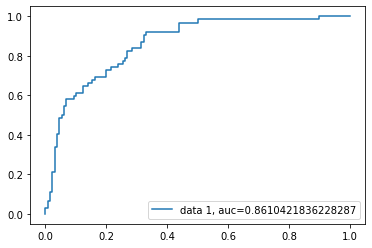

In [40]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In Tuesday's morning lecture, Marco from class said to check the comments of the article corresponding to this tutorial because there are different ways to fix the errors.